In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [30]:
og_lenna = plt.imread('./images/lenna.png')

lenna_img = np.array(og_lenna)

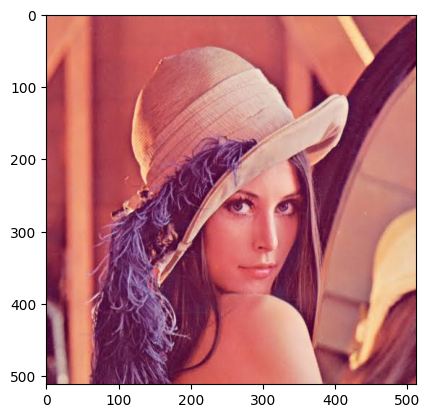

In [31]:
plt.imshow(og_lenna)

In [13]:
og_lenna.shape

(512, 512, 4)

Text(0.5, 1.0, 'cropped img')

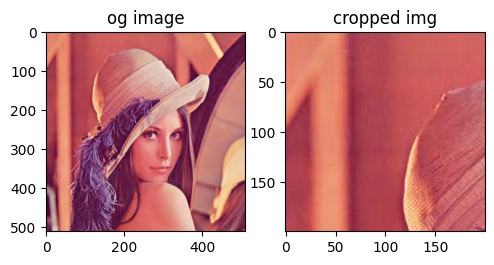

In [32]:
fig = plt.figure(figsize=(18,7))
fig.tight_layout()
row = 2
col = 6
cropped_img = og_lenna[0:200,0:200]

fig.add_subplot(row,col,1)
plt.imshow(og_lenna)
plt.title("og image")

fig.add_subplot(row,col,2)
plt.imshow(cropped_img)
plt.title("cropped img")

SLIC number of segments:148
watershed number of segments:256


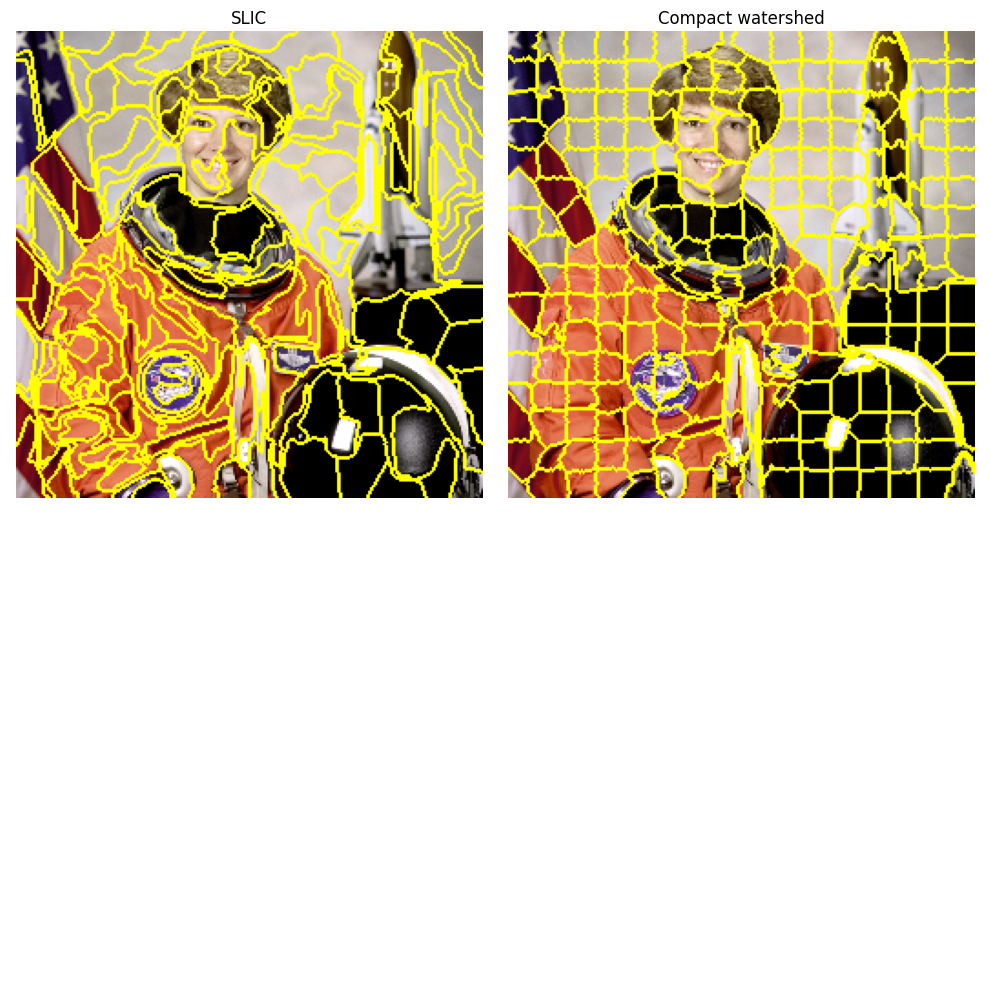

In [37]:
img = img_as_float(astronaut()[::2, ::2])
segments_slic = slic(img, n_segments=250, compactness=1, sigma=2)
gradient = sobel(rgb2gray(img))
#call watershed with segment compactness = 0.1
segments_watershed = watershed(gradient, markers=250, compactness=0.01)
#count the number of segments
print('SLIC number of segments:{}'.format(len(np.unique(segments_slic))))
print('watershed number of segments:{}'.format(len(np.unique(segments_watershed))))
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True,
sharey=True)
ax[0, 0].imshow(mark_boundaries(img, segments_slic))
ax[0, 0].set_title('SLIC')
ax[0, 1].imshow(mark_boundaries(img, segments_watershed))
ax[0, 1].set_title('Compact watershed')
for a in ax.ravel():
    a.set_axis_off()
plt.tight_layout()
plt.show()

(346, 360, 3)
(512, 256, 3)


ValueError: The input image is too small given the values of pixels_per_cell and cells_per_block. It should have at least: 16 rows and 16 cols.

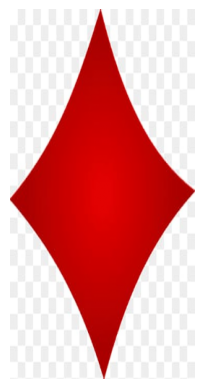

In [46]:
# HOG descriptor computation:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
img = imread('./images/red_dia.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)
resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2, 2), visualize=True,channel_axis=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

ValueError: The input image is too small given the values of pixels_per_cell and cells_per_block. It should have at least: 16 rows and 16 cols.